In [123]:
install.packages("dplyr") 
install.packages("ggplot2")
library(lubridate)
install.packages("data.table")
library(hms)
# Load libraries
library(dplyr)
library(ggplot2)
library(data.table)




The downloaded binary packages are in
	/var/folders/k9/qkhqzgnj1b7cpy3y24kcm4rw0000gn/T//RtmpR0iyuT/downloaded_packages

The downloaded binary packages are in
	/var/folders/k9/qkhqzgnj1b7cpy3y24kcm4rw0000gn/T//RtmpR0iyuT/downloaded_packages

The downloaded binary packages are in
	/var/folders/k9/qkhqzgnj1b7cpy3y24kcm4rw0000gn/T//RtmpR0iyuT/downloaded_packages


In [124]:
bolt_data <- read.csv("BOLT Data Set - Sheet1.csv")
head(bolt_data, 76)

,Card.Identifier,Transaction.Date,Transaction.Time,Risk.Assessment,Payment.Method,Transaction.Value,Merchant.Location,Card.Present.Status,Chip.Usage,Cross.border.Transaction..Yes.No.,Acquiring.Institution.ID,Merchant.Identifier,Merchant.Category.Code..MCC.,Fraud.Indicator..Yes.No.
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,card 1,2023-05-11 00:00:00,16:22:14.0,362,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812,No
2,card 2,2023-06-05 00:00:00,15:16:35.0,602,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121,No
3,card 3,2023-06-05 00:00:00,11:57:40.0,482,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211,No
4,card 4,2023-07-20 00:00:00,18:26:30.0,947,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814,No
5,card 5,2023-03-03 00:00:00,19:03:11.0,1382,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812,No
6,card 6,2023-07-22 00:00:00,18:04:28.0,612,Paypass - Contactless,75.77,USA,CP,Yes,No,acquirer 5,merchant 1,5812,No
7,card 7,2023-12-19 00:00:00,21:42:49.0,1327,Online,0.00,USA,CNP,No,No,acquirer 6,merchant 5,5816,No
8,card 8,2023-12-14 00:00:00,61:74:8.0,1037,Subscription,2.99,USA,CNP,No,No,acquirer 6,merchant 5,5816,No
9,card 9,2023-02-07 00:00:00,80:05:4.0,497,Online,30.00,USA,CNP,No,No,acquirer 2,merchant 6,8398,No


In [125]:
correct_time_format_conditional <- function(time_str) {
     # Regular expression to match correct time format (HH:MM:SS)
     correct_format_pattern <- "^([01]\\d|2[0-3]):([0-5]\\d):([0-5]\\d)$"
     
     # Check if the time string already matches the correct format
     if (grepl(correct_format_pattern, time_str)) {
         return(time_str) # Return the original string if it's already correct
     } else {
         # If not correct, proceed with adding a leading zero and rearranging
         digits <- gsub("\\D", "", paste0("0", time_str))
         
         # Ensuring we only consider the last 6 digits if more are present
         if (nchar(digits) > 6) {
             digits <- substr(digits, nchar(digits) - 5, nchar(digits))
         }
         
         # Construct the corrected time format
        corrected_time <- sprintf("%s:%s:%s", substr(digits, 1, 2), substr(digits, 3, 4), substr(digits, 5, 6))
         
         return(corrected_time)
     }
 }
 
 # Applying the conditional correction across a column
 bolt_dataset_time_fixed <- bolt_data %>%
     mutate(Transaction.Time = sapply(Transaction.Time, correct_time_format_conditional))



library(dplyr)
library(stringr)

bolt_dataset <- bolt_data %>%
  mutate(Transaction.Time = str_replace(Transaction.Time, "\\.0$", ""))



correct_time_format_conditional <- function(time_str) {
     # Regular expression to match correct time format (HH:MM:SS)
     correct_format_pattern <- "^([01]\\d|2[0-3]):([0-5]\\d):([0-5]\\d)$"
     
     # Check if the time string already matches the correct format
     if (grepl(correct_format_pattern, time_str)) {
         return(time_str) # Return the original string if it's already correct
     } else {
         # If not correct, proceed with adding a leading zero and rearranging
         digits <- gsub("\\D", "", paste0("0", time_str))
         
         # Ensuring we only consider the last 6 digits if more are present
         if (nchar(digits) > 6) {
             digits <- substr(digits, nchar(digits) - 5, nchar(digits))
         }
         
         # Construct the corrected time format
        corrected_time <- sprintf("%s:%s:%s", substr(digits, 1, 2), substr(digits, 3, 4), substr(digits, 5, 6))
         
         return(corrected_time)
     }
 }
 
 # Applying the conditional correction across a column
 bolt_dataset_time_fixed <- bolt_dataset %>%
     mutate(Transaction.Time = sapply(Transaction.Time, correct_time_format_conditional))

#bolt_data_clean <- bolt_dataset_time_fixed %>% 
#  filter(


    



In [126]:

fix_time_format <- function(times) {
    # Function to pad single digit to double digit
    pad_digit <- function(x) {
        if (nchar(x) == 1) {
            return(paste0("0", x))
        }
        return(x)
    }
    
    # Split the string by ':', pad each part, and then recombine
    times <- sapply(times, function(time) {
        parts <- strsplit(time, ":")[[1]]
        parts <- lapply(parts, pad_digit)
        # Reconstruct the time parts into HH:MM:SS
        time_fixed <- paste0(ifelse(length(parts) < 3, "00", parts[1]), ":", 
                             ifelse(length(parts) < 2, "00", parts[length(parts) - 1]), ":",
                             ifelse(length(parts) < 1, "00", pad_digit(parts[length(parts)])))
        return(time_fixed)
    })
    
    return(times)
}
bolt_dataset<- bolt_dataset_time_fixed %>%
     mutate(Transaction.Time = sapply(Transaction.Time, fix_time_format))

bolt_data_clean <- bolt_dataset%>%
    filter(Transaction.Time!="00:00:") %>%
    na.omit(bolt_dataset_time_fixed)

head(bolt_data_clean)


,Card.Identifier,Transaction.Date,Transaction.Time,Risk.Assessment,Payment.Method,Transaction.Value,Merchant.Location,Card.Present.Status,Chip.Usage,Cross.border.Transaction..Yes.No.,Acquiring.Institution.ID,Merchant.Identifier,Merchant.Category.Code..MCC.,Fraud.Indicator..Yes.No.
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,card 1,2023-05-11 00:00:00,16:22:14,362,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812,No
2,card 2,2023-06-05 00:00:00,15:16:35,602,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121,No
3,card 3,2023-06-05 00:00:00,11:57:40,482,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211,No
4,card 4,2023-07-20 00:00:00,18:26:30,947,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814,No
5,card 5,2023-03-03 00:00:00,19:03:11,1382,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812,No
6,card 6,2023-07-22 00:00:00,18:04:28,612,Paypass - Contactless,75.77,USA,CP,Yes,No,acquirer 5,merchant 1,5812,No


In [127]:
bolt_data <- bolt_data_clean %>%
  mutate(Transaction.Time = as.POSIXct(paste(Sys.Date(), Transaction.Time), format = "%Y-%m-%d %H:%M:%S"))


In [128]:
bolt_time_vs_risk <- bolt_data %>%

  mutate(Hour = hour(Transaction.Time)) %>%
  filter(!is.na(Hour)) %>% 
  group_by(Hour) %>%   # Group by the hour
  summarize(Avg_Risk_Assessment = mean(Risk.Assessment, na.rm = TRUE))


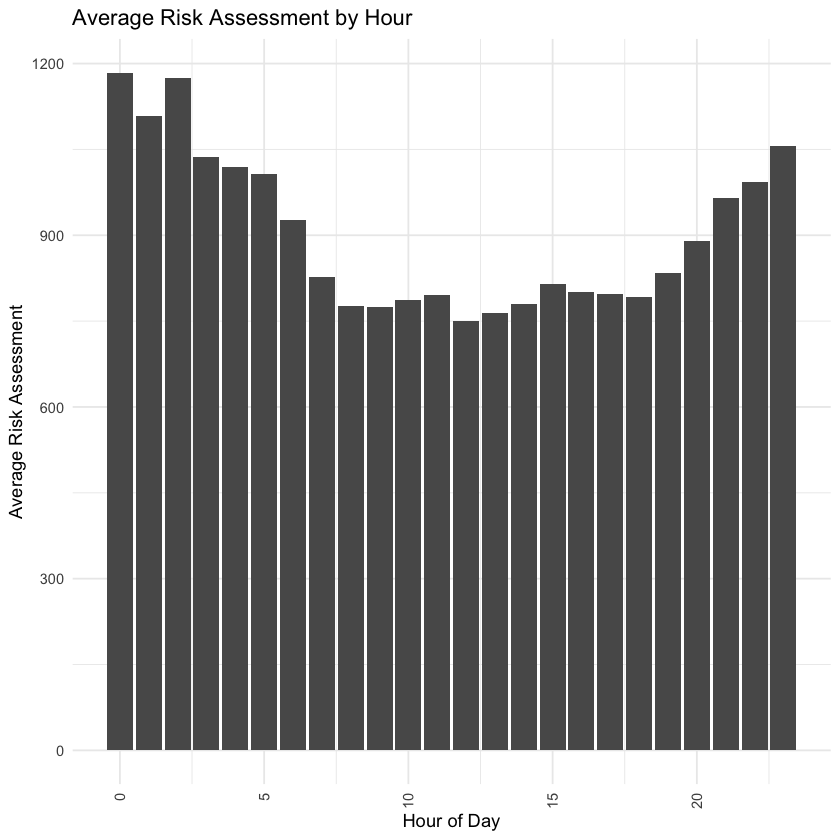

In [129]:

time_vs_risk_plot <- ggplot(bolt_time_vs_risk, aes(x=Hour,y=Avg_Risk_Assessment))+
geom_bar(stat = "identity")+
theme_minimal() +
labs(x = "Hour of Day", y = "Average Risk Assessment", title = "Average Risk Assessment by Hour") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
time_vs_risk_plot


In [144]:

clean_bolt_data <- bolt_data %>%
    rename(fraud_indicator=Fraud.Indicator..Yes.No.,
           crossborder_transaction=Cross.border.Transaction..Yes.No.,
           mcc=Merchant.Category.Code..MCC.) 



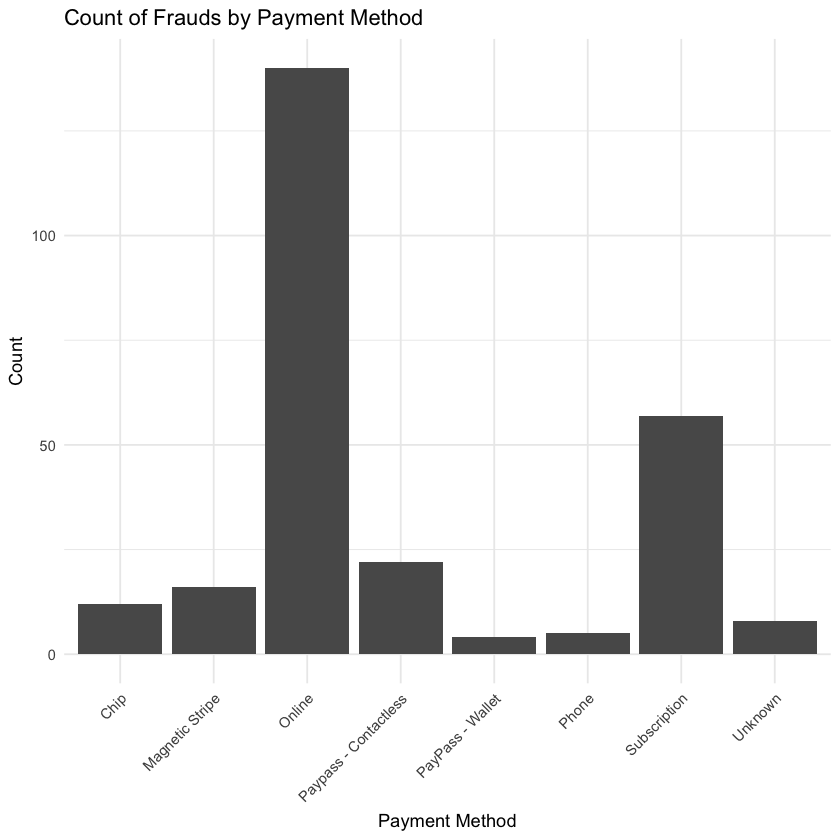

In [154]:
payment_method_fraud <- clean_bolt_data %>%
  filter(fraud_indicator=="Yes") %>%
  ggplot(aes(x = Payment.Method)) +
  geom_bar(position = position_dodge(width = 0.9)) +  
  theme_minimal() +
  labs(title = "Count of Frauds by Payment Method",
       x = "Payment Method",
       y = "Count")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(payment_method_fraud)